## Experiment Quantum Computer

In this notebook my aim is to measure an optimal amplitude for the $\pi$ pulse using an Rabi Experiment. With this I will calculate the $T_1$ and $T_2$ values for qubit 0 in the real quantum computer: ***ibm_osaka***. In order to calculate $T_2$ I will use a simple Dynamical Decoupling routine called Hahn Echo.
### $T_1$
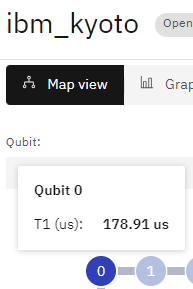
### $T_2$
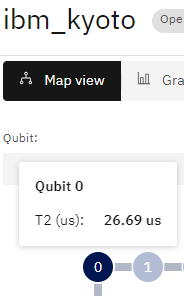

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, execute, assemble, schedule, IBMQ
from qiskit import pulse, schedule
from qiskit.pulse.library import Gaussian
import numpy as np
from qiskit.circuit import Gate, Parameter
import matplotlib.pyplot as plt
from qiskit.pulse.library import Drag
from qiskit.visualization import plot_histogram
import qiskit

In [2]:
from scipy.optimize import curve_fit  ### Usaremos a função do scipy curve_fit para fazer o ajuste do decaimento exponencial
# a documentação do curve_fit explica o uso de cada uma das funções utilizadas no código
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
import numpy as np

In [3]:
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub = 'ibm-q', group = 'open', project = 'main')
provider.backends()

C:\Users\pedro\AppData\Local\Temp\ipykernel_8284\637951043.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  qiskit.IBMQ.load_account()
C:\Users\pedro\AppData\Local\Temp\ipykernel_8284\637951043.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  qiskit.IBMQ.load_account()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
device= provider.get_backend('ibm_kyoto')

In [5]:
device_def = device.defaults();device_config = device.configuration()

In [6]:
print(device_def)

<PulseDefaults(<InstructionScheduleMap(1Q instructions:
  q0: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q1: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q2: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q3: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q4: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q5: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q6: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q7: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q8: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q9: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q10: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q11: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q12: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q13: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q14: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 'u3'}
  q15: {'measure', 'id', 'u1', 'x', 'sx', 'u2', 'rz', 

In [60]:
print(device_config.to_dict())


{'backend_name': 'ibm_kyoto', 'backend_version': '1.2.38', 'n_qubits': 127, 'basis_gates': ['id', 'rz', 'sx', 'x', 'ecr', 'reset'], 'gates': [{'name': 'id', 'parameters': [], 'qasm_def': 'gate id q { U(0, 0, 0) q; }', 'coupling_map': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], 

In [7]:
dt = device_config.dt
print(f"Sampling time: {dt*1e9} ns") 

Sampling time: 0.5 ns


In [8]:
GHz = 1.0e9
MHz = 1.0e6
us = 1.0e-6
ns =1.0e-9

In [9]:
num_rabi_points = 50 # do a span of 50

inital_amp = 0.01
end_amp = 0.75

rabi_points = np.linspace(inital_amp, end_amp, num_rabi_points)

In [10]:
def get_closest_multiple_of_16(num):
    return int(num + 8) - (int(num + 8) % 16)

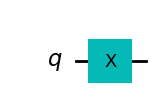

In [11]:
circ_x = QuantumCircuit(1)
circ_x.x(0)
circ_x.draw('mpl')

In [12]:
schedule(circ_x, backend=device)

Schedule((0, Play(Drag(duration=120, sigma=30, beta=0.1582406434982713, amp=0.11964739064789774, angle=0.0, name='Xp_d0'), DriveChannel(0), name='Xp_d0')), name="circuit-88")

In [14]:
drive_amp = Parameter('drive_amp')
qubit = 0
with pulse.build(backend = device, default_alignment = 'sequential', name = 'Rabi Experiment') as rabi_sched:
    drive_chan = pulse.drive_channel(qubit)

    pulse.play(pulse.Gaussian(duration = dur, amp=drive_amp, sigma = sigma, name = 'Rabi Pulse'), drive_chan)
    
rabi_schedules = [rabi_sched.assign_parameters({drive_amp: a}, inplace = False) for a in rabi_points]
    

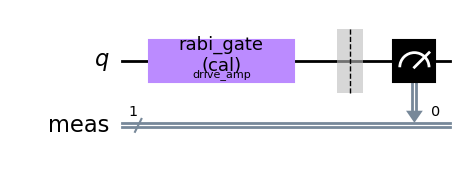

In [15]:
qc = QuantumCircuit(1)
rabi_gate = Gate('rabi_gate', 1, [drive_amp])
qc.append(rabi_gate,[0])# putting the custom gate in the qubit 0 in the Quantum Circuit
qc.measure_all()

qc.add_calibration(rabi_gate, [0], rabi_sched)
qc.draw('mpl')

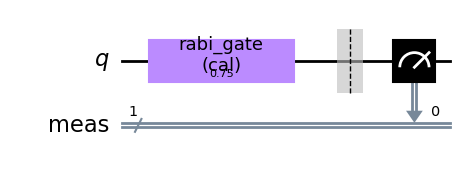

In [16]:
rabi_circuits = [qc.assign_parameters({drive_amp: a}, inplace = False) for a in rabi_points]
rabi_circuits[-1].draw('mpl')

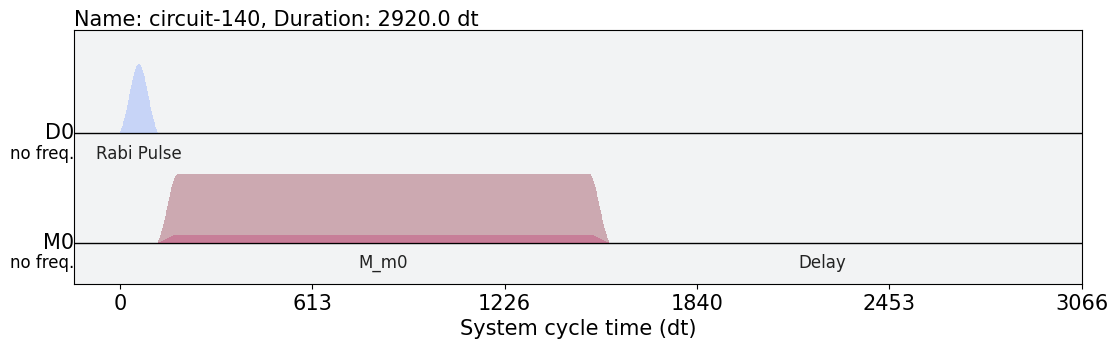

In [17]:
scheduled_circuits = schedule(rabi_circuits, backend=device)
scheduled_circuits[-1].draw()

In [18]:
shots = 2**10 # 1024
job = device.run(scheduled_circuits, shots = shots)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

C:\Users\pedro\anaconda3\envs\qiskit-39\lib\site-packages\qiskit\compiler\assembler.py:458: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn(


cr50f1wkt0wg008cfzm0
Job Status: job has successfully run


In [19]:
results = job.result().get_counts()
for entry in results:
    if '0' in entry and entry['0'] == 4096:
        entry['1'] = 0
    elif '1' in entry and entry['1'] == 4096:
        entry['0'] = 1
prob_1 = [i['1']/sum(i.values()) for i in results]

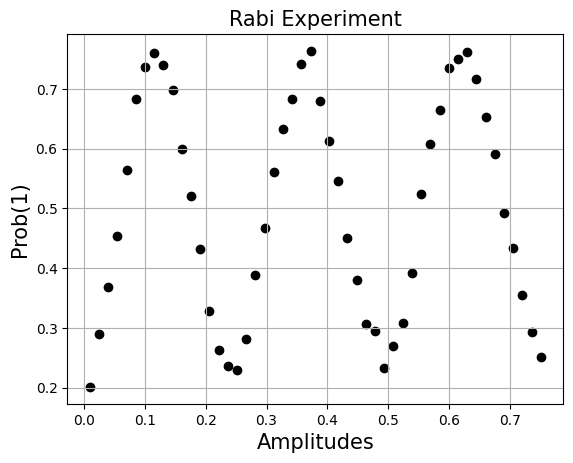

In [20]:
plt.scatter(rabi_points, prob_1, color = 'black') 
plt.title("Rabi Experiment", fontsize=15)
plt.xlabel('Amplitudes', fontsize=15)
plt.ylabel('Prob(1)', fontsize=15)
plt.grid()
plt.show()

In [21]:
from scipy.optimize import curve_fit

def fit_function(x_values, y_values, function, initial_parameters):
    fitparams, conv = curve_fit(function, x_values, y_values, initial_parameters)
    y_fit = function(x_values, *fitparams)
    return fitparams, y_fit

In [22]:
fit_param, y_fit = fit_function(rabi_points, prob_1,
                               lambda x, A, B, drive_period, phi: (A*np.cos(2*np.pi*x/drive_period - phi) + B), [0.5,0.5 ,0.35,np.pi])

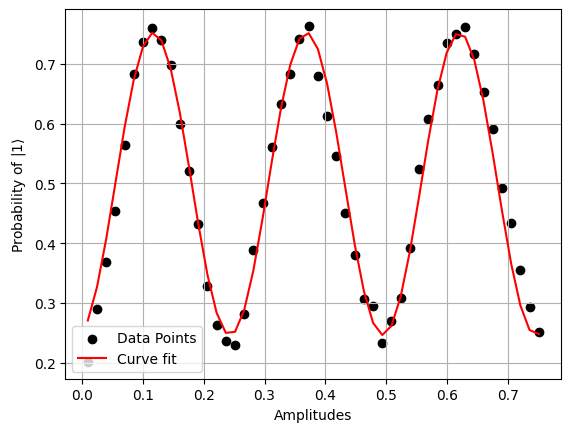

In [23]:
plt.scatter(rabi_points, prob_1, color = 'black', label = 'Data Points') 
plt.plot(rabi_points, y_fit, color= 'red', label = r'Curve fit')
plt.xlabel('Amplitudes')
plt.ylabel(r'Probability of $|1\rangle$')
drive_period = fit_param[2]
plt.grid()
plt.legend()
plt.show()

In [24]:
pi_amp = abs(drive_period/2)
print(f'Pi Amplitude = {pi_amp}')

Pi Amplitude = 0.12549475904626559


Now the $\pi$ pulse can be defined as:

In [25]:
with pulse.build(backend = device) as pi_pulse:
    drive_chan = pulse.drive_channel(qubit)

    pulse.play(pulse.Gaussian(duration = 120, amp=pi_amp, sigma = 30, name = 'Pi Pulse'), drive_chan)

In [26]:
print(pi_pulse)

ScheduleBlock(Play(Gaussian(duration=120, sigma=30, amp=0.12549475904626559, angle=0, name='Pi Pulse'), DriveChannel(0), name='Pi Pulse'), name="block1", transform=AlignLeft())


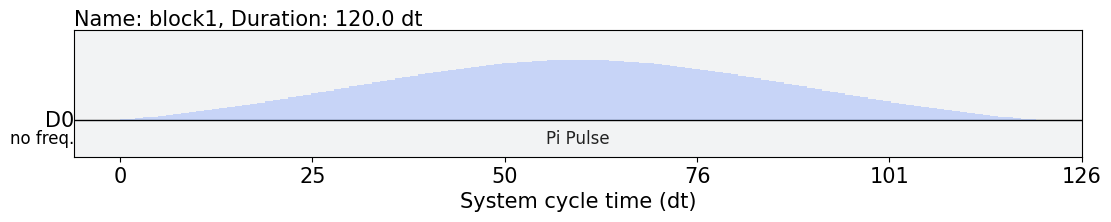

In [27]:
pi_pulse.draw()

In [28]:
# Delimit time span:
time_max = 450*us
delay_time_secs = np.linspace(1*us, time_max, 200)

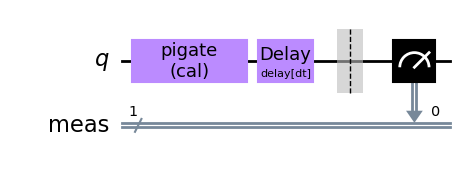

In [29]:
delay = Parameter('delay')
circ_t1 = QuantumCircuit(1)
pigate = Gate('pigate', 1, [])
circ_t1.append(pigate, [0])
circ_t1.add_calibration('pigate',[0],pi_pulse)
circ_t1.delay(delay,0)
circ_t1.add_calibration("x",[0], pi_pulse)
circ_t1.measure_all()
circ_t1.draw('mpl')

In [30]:
circuits_t1 = [circ_t1.assign_parameters({delay: get_closest_multiple_of_16((int(a/(dt))))}, inplace = False) for a in delay_time_secs]

ERROR Failed to execute program: Delays must be a multiple of 8 samples

In [31]:
dt

5e-10

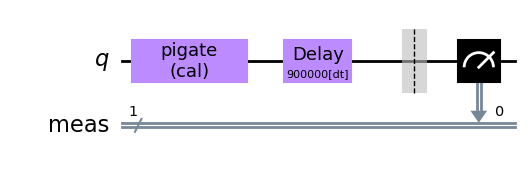

In [32]:
circuits_t1[-1].draw('mpl')

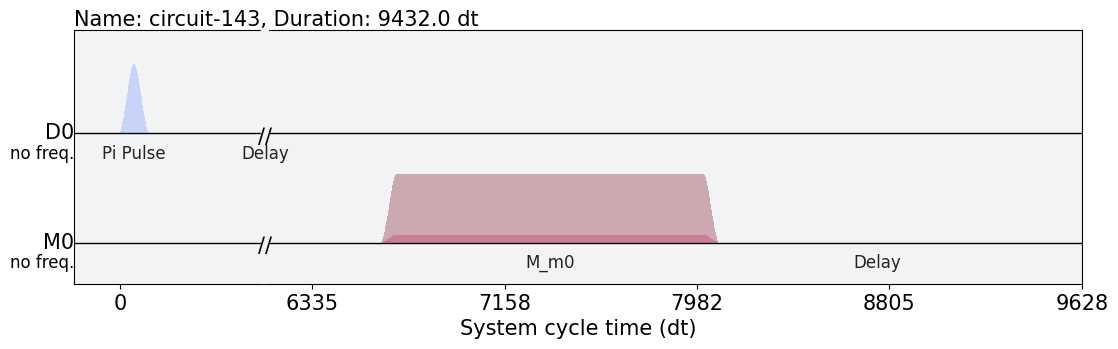

In [33]:
schedule_t1 = schedule(circuits_t1, backend=device )
schedule_t1[1].draw()

In [34]:
num_shots = 2**10

job_t1 = device.run(circuits_t1, shots = num_shots)
print(job_t1.job_id())
job_monitor(job_t1)

cr50gpttxj10008a0j8g
Job Status: job has successfully run


In [38]:
t1_res = job_t1.result().get_counts()

In [39]:
prob_1 = [i['1']/sum(i.values()) for i in t1_res]

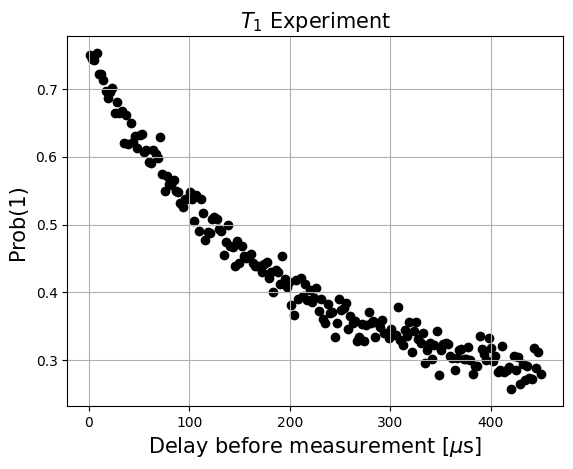

In [40]:
t1_values = []

plt.scatter(delay_time_secs/us, prob_1, c = 'black') 
plt.title("$T_1$ Experiment", fontsize=15)
plt.xlabel('Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Prob(1) ', fontsize=15)
plt.grid()
plt.show()

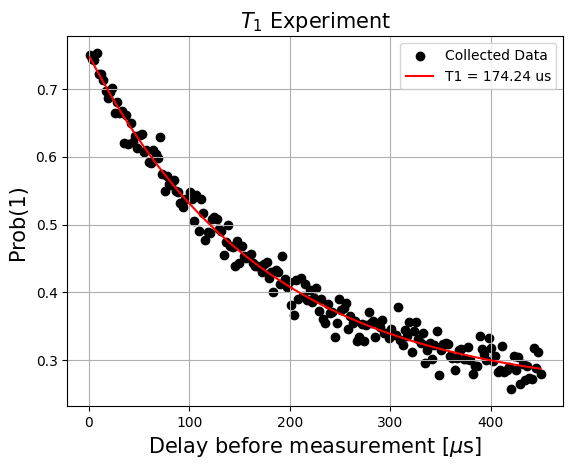

In [49]:
fit_params, y_fit = fit_function(delay_time_secs/us, prob_1, lambda x, A, C, T1: (A*np.exp(-x/T1) + C), [1,0,100])

T1 = fit_params[-1]

plt.scatter(delay_time_secs/us, prob_1, c = 'black', label = 'Collected Data') 
plt.plot(delay_time_secs/us, y_fit, c= 'red', label = f'T1 = {T1:.2f} us')
plt.title(r"$T_1$ Experiment", fontsize=15)
plt.xlabel(r'Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Prob(1) ', fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [72]:
error = ((T1 - 178.98)/178.98)*100
print(f'Error = {np.abs(error):.2f}%')

Error = 2.65%


Median T1 for qubit 0, as indicated on the IBM website is of $178.91 \text{us}$. Whereas in this experiment we found $174.24 \text{us}$. 
An error of $\epsilon = 2.65\%$. Very good!

$T_2$

In [79]:
pi2_amp = pi_amp/2

with pulse.build(device) as x90pulse:
    drive_chan = pulse.drive_channel(qubit)

    pulse.play(pulse.Gaussian(duration = 120, amp=pi2_amp, sigma = 30, name = 'pi/2 Pulse'), drive_chan)
    

In [80]:
delay_times = np.linspace(1*us, 200*us,50)

In [81]:
qc_t2 = QuantumCircuit(1)

x90gate = Gate('x90gat', 1, [])
pigate = Gate('pigate', 1, [])

qc_t2.h(0)
qc_t2.delay(delay, 0)
qc_t2.x(0)
qc_t2.delay(delay,0)
qc_t2.h(0)

qc_t2.add_calibration('h', [0], x90pulse)
qc_t2.add_calibration('x', [0], pi_pulse)

qc_t2.measure_all()

exp_t2_circuits = [qc_t2.assign_parameters({delay: get_closest_multiple_of_16((int(a/(dt))))}, inplace = False) for a in delay_times]

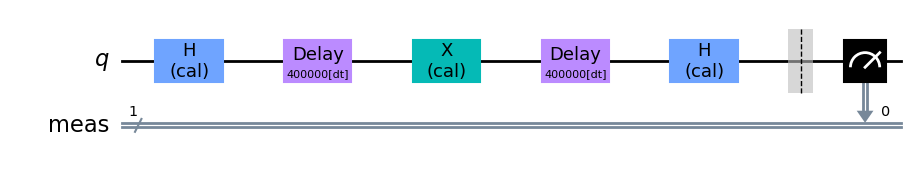

In [82]:
exp_t2_circuits[-1].draw('mpl')

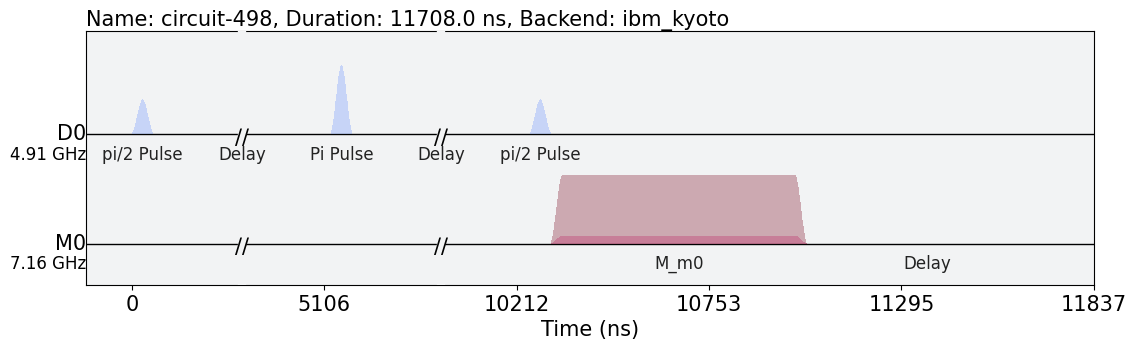

Schedule((0, Play(Gaussian(duration=120, sigma=30, amp=0.06274737952313279, angle=0, name='pi/2 Pulse'), DriveChannel(0), name='pi/2 Pulse')), (120, Delay(10128, DriveChannel(0))), (10248, Play(Gaussian(duration=120, sigma=30, amp=0.12549475904626559, angle=0, name='Pi Pulse'), DriveChannel(0), name='Pi Pulse')), (10368, Delay(10128, DriveChannel(0))), (20496, Play(Gaussian(duration=120, sigma=30, amp=0.06274737952313279, angle=0, name='pi/2 Pulse'), DriveChannel(0), name='pi/2 Pulse')), (20616, Acquire(1440, AcquireChannel(0), MemorySlot(0))), (20616, Play(GaussianSquare(duration=1440, sigma=32, width=1312, amp=0.36, angle=1.4576907539948136, name='M_m0'), MeasureChannel(0), name='M_m0')), (22056, Delay(1360, MeasureChannel(0))), name="circuit-498")


In [84]:
schedule_of_t2 = schedule(exp_t2_circuits[1], backend = device)
display(schedule_of_t2.draw(backend=device))
print(schedule_of_t2)

In [87]:
num_shots_per_point = 2**10

job_t2 = device.run(exp_t2_circuits,
               shots = num_shots)

print(job_t2.job_id())
job_monitor(job_t2)

NameError: name 'job_t2job_id' is not defined

In [ ]:
job_t2_id = 'cr51gwk0dz600086r6a0'

In [88]:
job_monitor(job_t2)

Job Status: job has successfully run


In [89]:
t2_result = job_t2.result(timeout = 500)
t2counts = t2_result.get_counts()

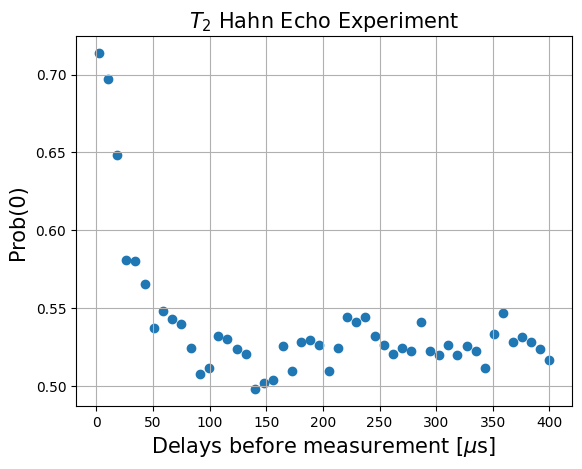

In [90]:
prob_0 = [i['0']/sum(i.values()) for i in t2counts]
plt.scatter(2*delay_times/us, prob_0) 
plt.title("$T_2$ Hahn Echo Experiment", fontsize=15)
plt.xlabel('Delays before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Prob(0) ', fontsize=15)
plt.grid()
plt.show()

24.44757514495866


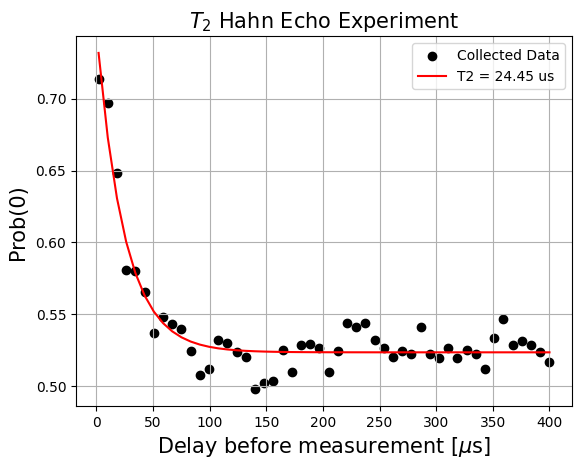

In [91]:
fit_params, y_fit = fit_function(2*delay_times/us, prob_0,
             lambda x, A, B, T2: (A * np.exp(-x / T2) + B),
             [-3, 0, 100])

T2 = fit_params[-1]
print(T2)

plt.scatter(2*delay_times/us, prob_0, c = 'black', label = 'Collected Data') 
plt.plot(2*delay_times/us, y_fit, c= 'red', label = f'T2 = {T2:.2f} us')
plt.title(r"$T_2$ Hahn Echo Experiment", fontsize=15)
plt.xlabel(r'Delay before measurement [$\mu$s]', fontsize=15)
plt.ylabel('Prob(0) ', fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [92]:
error = ((T2-26.69)/26.69)*100
print(f'Error = {np.abs(error):.2f}%')

Error = 8.40%


Median T2 for qubit 0, as indicated on the IBM website is of $26.69 \text{us}$. Whereas in this experiment we found $24.45 \text{us}$. 
An error of $\epsilon = 8.40\%$. Very good!

### Conclusion:
The experiments here aimed to show that, even using real Quantum Computers, we are able to determine the optimal amplitude for $\pi$ pulse, and consequently for the $\frac{\pi}{2}$ pulse also. In addition to this, we put these two pulses in practice running a $T_1$ and $T_2$ routines. In the case of $T_2$ we even used a Dynamical Decoupling technique called Hahn Echoes. In both cases we were able to accurately predict the values for both decoherence times of qubit 0 as shown above. 